### Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Shailesh\Documents\NEw Folder\ML 2\Mushroom Classification.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
pd.set_option('display.max_columns', None)
# Every column will be shown if this function is used.

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
df.shape

(8124, 23)

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Data Manipulation

In [9]:
df = df.astype('category')
df.info()
# converting object(Dtype) into category(Dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [10]:
La = LabelEncoder()
for column in df.columns:
    df[column] = La.fit_transform(df[column])

In [11]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


### Splitting into X and Y

In [12]:
X = df.drop(['class'], axis=1)
Y = df[['class']]

In [13]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


### Applying PCA - Principle Comopnent Analysis

 

In [14]:
from sklearn.decomposition import PCA
PCA1 = PCA(n_components=7)
pca_fit = PCA1.fit_transform(X)

In [15]:
PCA1.explained_variance_ratio_

array([0.33758733, 0.16581098, 0.12285821, 0.06796611, 0.05831173,
       0.05092539, 0.04670841])

In [16]:
sum(PCA1.explained_variance_ratio_)

0.8501681635086221

7 components retain 85% infomartion from dataset.

### Splitting into train and test

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(pca_fit, Y, test_size=0.20, random_state=42)

In [18]:
print(X_train)

[[ 7.11666079 -2.04335194  0.58359556 ... -1.90182908 -0.80613229
  -0.02418544]
 [ 6.17595898  1.68576215 -0.96814859 ...  2.80668198  0.42722721
   2.56943836]
 [ 7.57107815 -2.4073196   0.16605645 ... -0.82338225 -0.78361225
  -1.1164396 ]
 ...
 [-4.85510949 -2.15771305 -2.0931342  ...  3.45422782 -0.59087532
  -0.72302036]
 [ 6.37808881  0.67611882  0.90648857 ...  3.50431294 -1.01042039
   1.09420719]
 [ 3.64709333 -1.66274146 -1.21426462 ... -0.11997875 -1.44771514
   0.65846378]]


### Import the models

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Model Training

In [20]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

svc = SVC()
svc.fit(X_train, Y_train)

Dt = DecisionTreeClassifier()
Dt.fit(X_train, Y_train)

Rc = RandomForestClassifier()
Rc.fit(X_train, Y_train)

Gr = GradientBoostingClassifier()
Gr.fit(X_train, Y_train)

GradientBoostingClassifier()

### Prediction

In [21]:
Y_pred = lr.predict(X_test)
Y_pred2 = knn.predict(X_test)
Y_pred3 = svc.predict(X_test)
Y_pred4 = Dt.predict(X_test)
Y_pred5 = Rc.predict(X_test)
Y_pred6 = Gr.predict(X_test)

### Evaluating

In [22]:
print('Logistic Reg. accuracy_score:',accuracy_score(Y_test, Y_pred))
print('KNN accuracy_score:',accuracy_score(Y_test, Y_pred2))
print('SVC accuracy_score:',accuracy_score(Y_test, Y_pred3))

Logistic Reg. accuracy_score: 0.8344615384615385
KNN accuracy_score: 0.9833846153846154
SVC accuracy_score: 0.952


In [23]:
print('Decision tree accuracy_score:',accuracy_score(Y_test, Y_pred4))
print('Random Forest accuracy_score:',accuracy_score(Y_test, Y_pred4))
print('Gradient Boosting accuracy_score:',accuracy_score(Y_test, Y_pred4))

Decision tree accuracy_score: 0.976
Random Forest accuracy_score: 0.976
Gradient Boosting accuracy_score: 0.976


In [24]:
Accuracy_Scores = pd.DataFrame({'Models':['LR', 'KNN', 'SVC', 'DTC', 'RFC', 'GBC'], 
                              'Accuracy Score':[accuracy_score(Y_test, Y_pred)*100,
                               accuracy_score(Y_test, Y_pred2)*100,
                               accuracy_score(Y_test, Y_pred3)*100,
                               accuracy_score(Y_test, Y_pred4)*100,
                               accuracy_score(Y_test, Y_pred5)*100,
                               accuracy_score(Y_test, Y_pred6)*100]})

In [25]:
Accuracy_Scores

,Models,Accuracy Score
0,LR,83.446154
1,KNN,98.338462
2,SVC,95.200000
3,DTC,97.600000
4,RFC,99.692308
5,GBC,93.846154


Best Model is Random Forest Classifier

In [26]:
import seaborn as sns

<AxesSubplot:xlabel='Models', ylabel='Accuracy Score'>

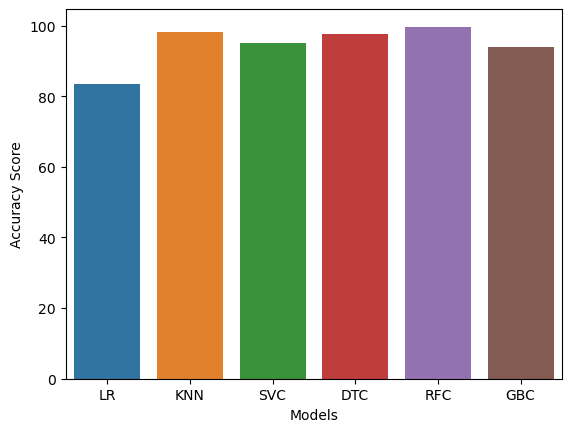

In [27]:
sns.barplot(Accuracy_Scores['Models'], Accuracy_Scores['Accuracy Score'])